## Importing libraries

In [1]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

## Importing training dataset

In [19]:
#creating dataframe object
df = pd.read_csv(R'winequalityN.csv')
print("Size :",df.shape)
columns = df.columns
columns

Size : (6497, 13)


Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [8]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
# dataset
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


# Exploratory data analysis

## Removing duplicate values 

In [47]:
data_unique = df.copy()
print("Size of dataset Before & After -->")
print("Before : "+str(data_unique.shape))
data_unique.drop_duplicates(keep = 'first', inplace = True)
print("After : "+str(data_unique.shape))
data_unique.head()
df = data_unique

Size of dataset Before & After -->
Before : (6497, 13)
After : (5329, 13)


## Finding Null values

In [48]:
percent = df.isnull().sum()/df.isnull().count()*100
total = df.isnull().sum().sort_values(ascending=False)
percent_sorted = (round(percent_1, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_sorted], axis=1, keys=['Total', '%'])
missing_data.head(7)

,Total,%
fixed acidity,10,0.15
pH,9,0.14
volatile acidity,8,0.12
sulphates,4,0.06
citric acid,3,0.05
chlorides,2,0.03
residual sugar,2,0.03


In [49]:
# check for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [50]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [51]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Finding extreme values 

In [52]:
df_copy = df.copy()
df_copy
min_col = {}
max_col = {}
for col in columns:
    max_col[col]= df_copy[col].max()
    min_col[col]= df_copy[col].min()
result = pd.DataFrame([min_col, max_col], index = ['Minimum', 'Maximum']).transpose()
result

,Minimum,Maximum
type,red,white
fixed acidity,3.8,15.9
volatile acidity,0.08,1.58
citric acid,0,1.66
residual sugar,0.6,65.8
chlorides,0.009,0.611
free sulfur dioxide,1,289
total sulfur dioxide,6,440
density,0.98711,1.03898
pH,2.72,4.01


## Finding uniques values 

In [55]:
df_copy = df.copy()
df_copy
values = {}
max_col = {}
for col in columns:
    unique_values = df_copy[col].unique()
    values[col] = unique_values if unique_values.size < 10 else unique_values.size
result = pd.DataFrame([values], index = ['Unique Values']).transpose()
result

,Unique Values
type,"[white, red]"
fixed acidity,107
volatile acidity,188
citric acid,90
residual sugar,317
chlorides,215
free sulfur dioxide,135
total sulfur dioxide,276
density,998
pH,109


# Exploratory Data Visualiztion

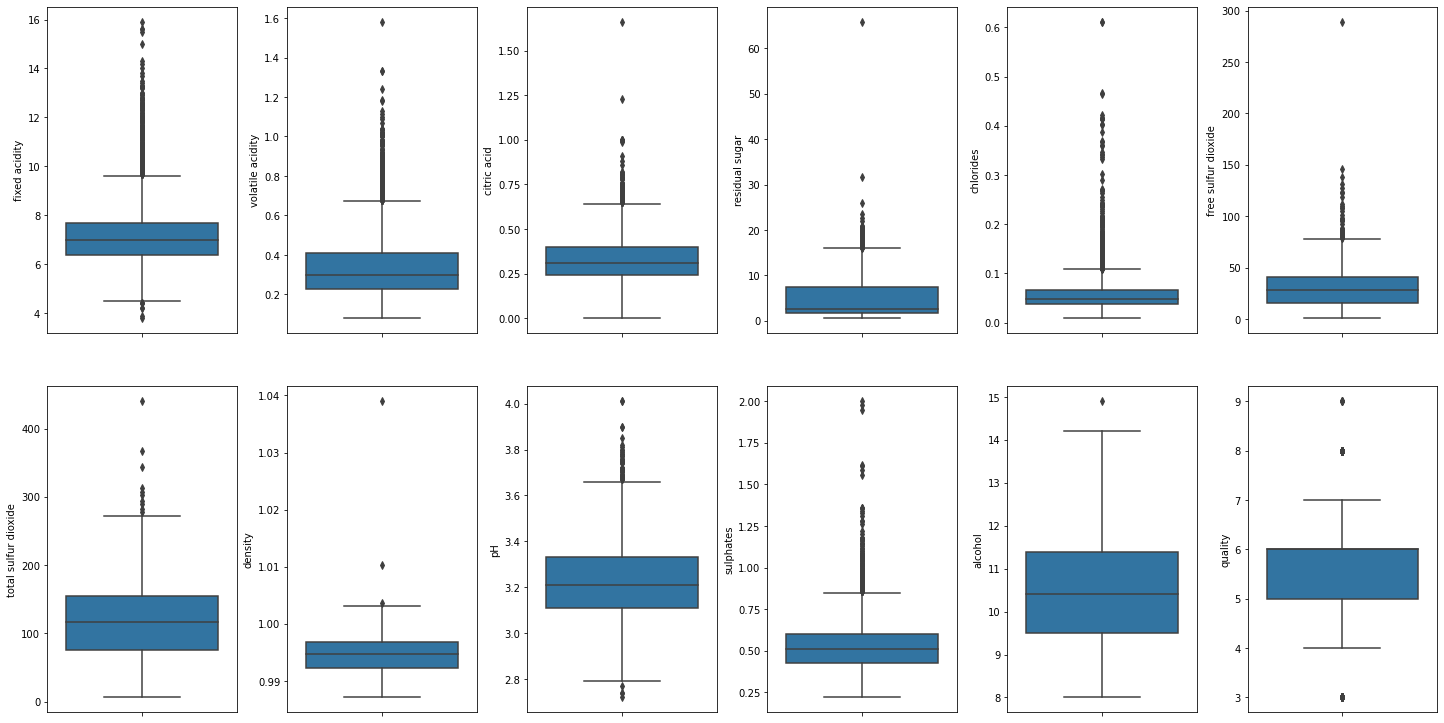

In [57]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

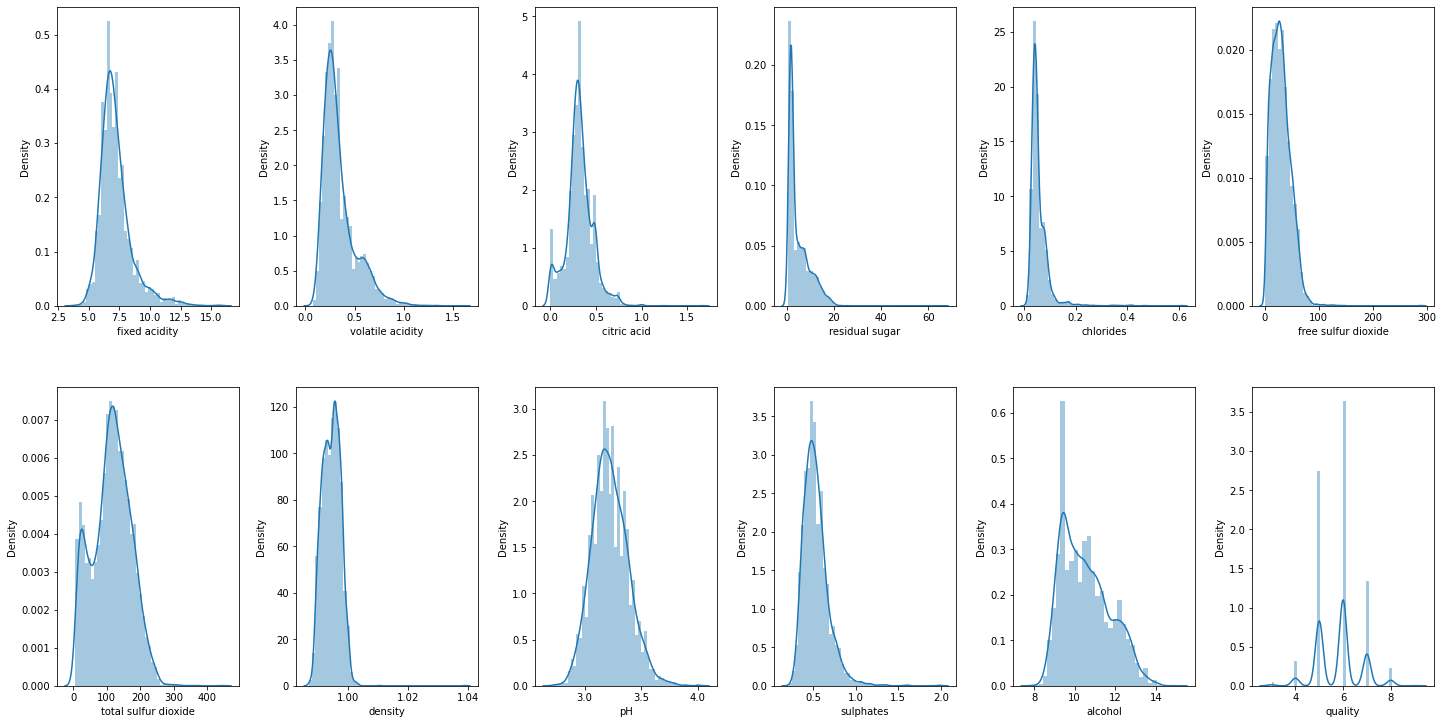

In [56]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

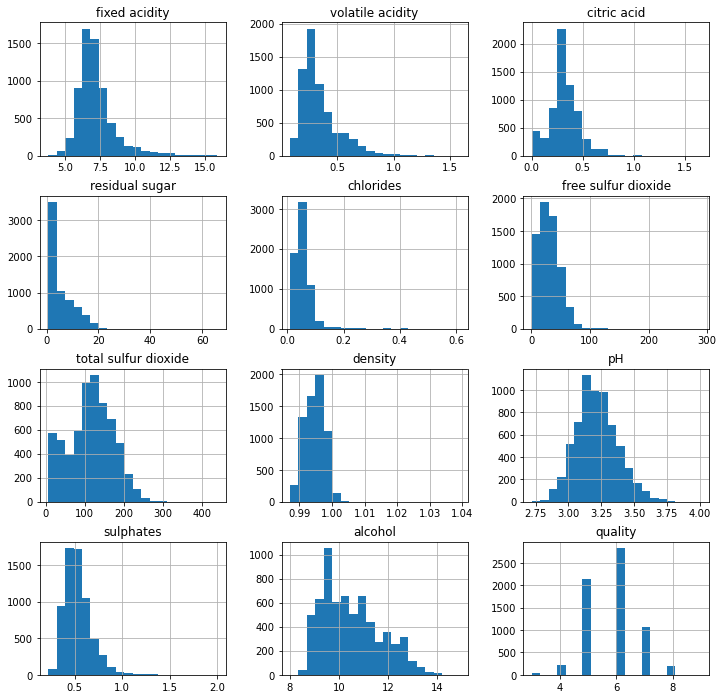

In [10]:
df.hist(bins=20,figsize=(12,12))
# display histogram
plt.show()

In [59]:
# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

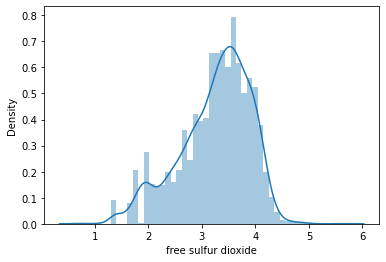

In [60]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

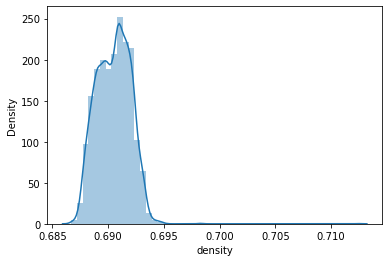

In [13]:
df['density'] = np.log(1 + df['density'])
sns.distplot(df['density'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

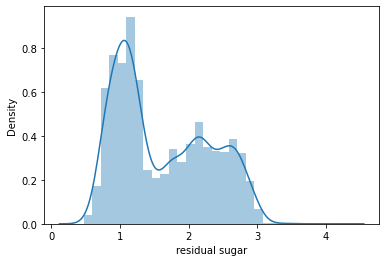

In [14]:
df['residual sugar'] = np.log(1 + df['residual sugar'])
sns.distplot(df['residual sugar'])

<AxesSubplot:title={'center':'Quality vs alcohol'}, xlabel='quality', ylabel='alcohol'>

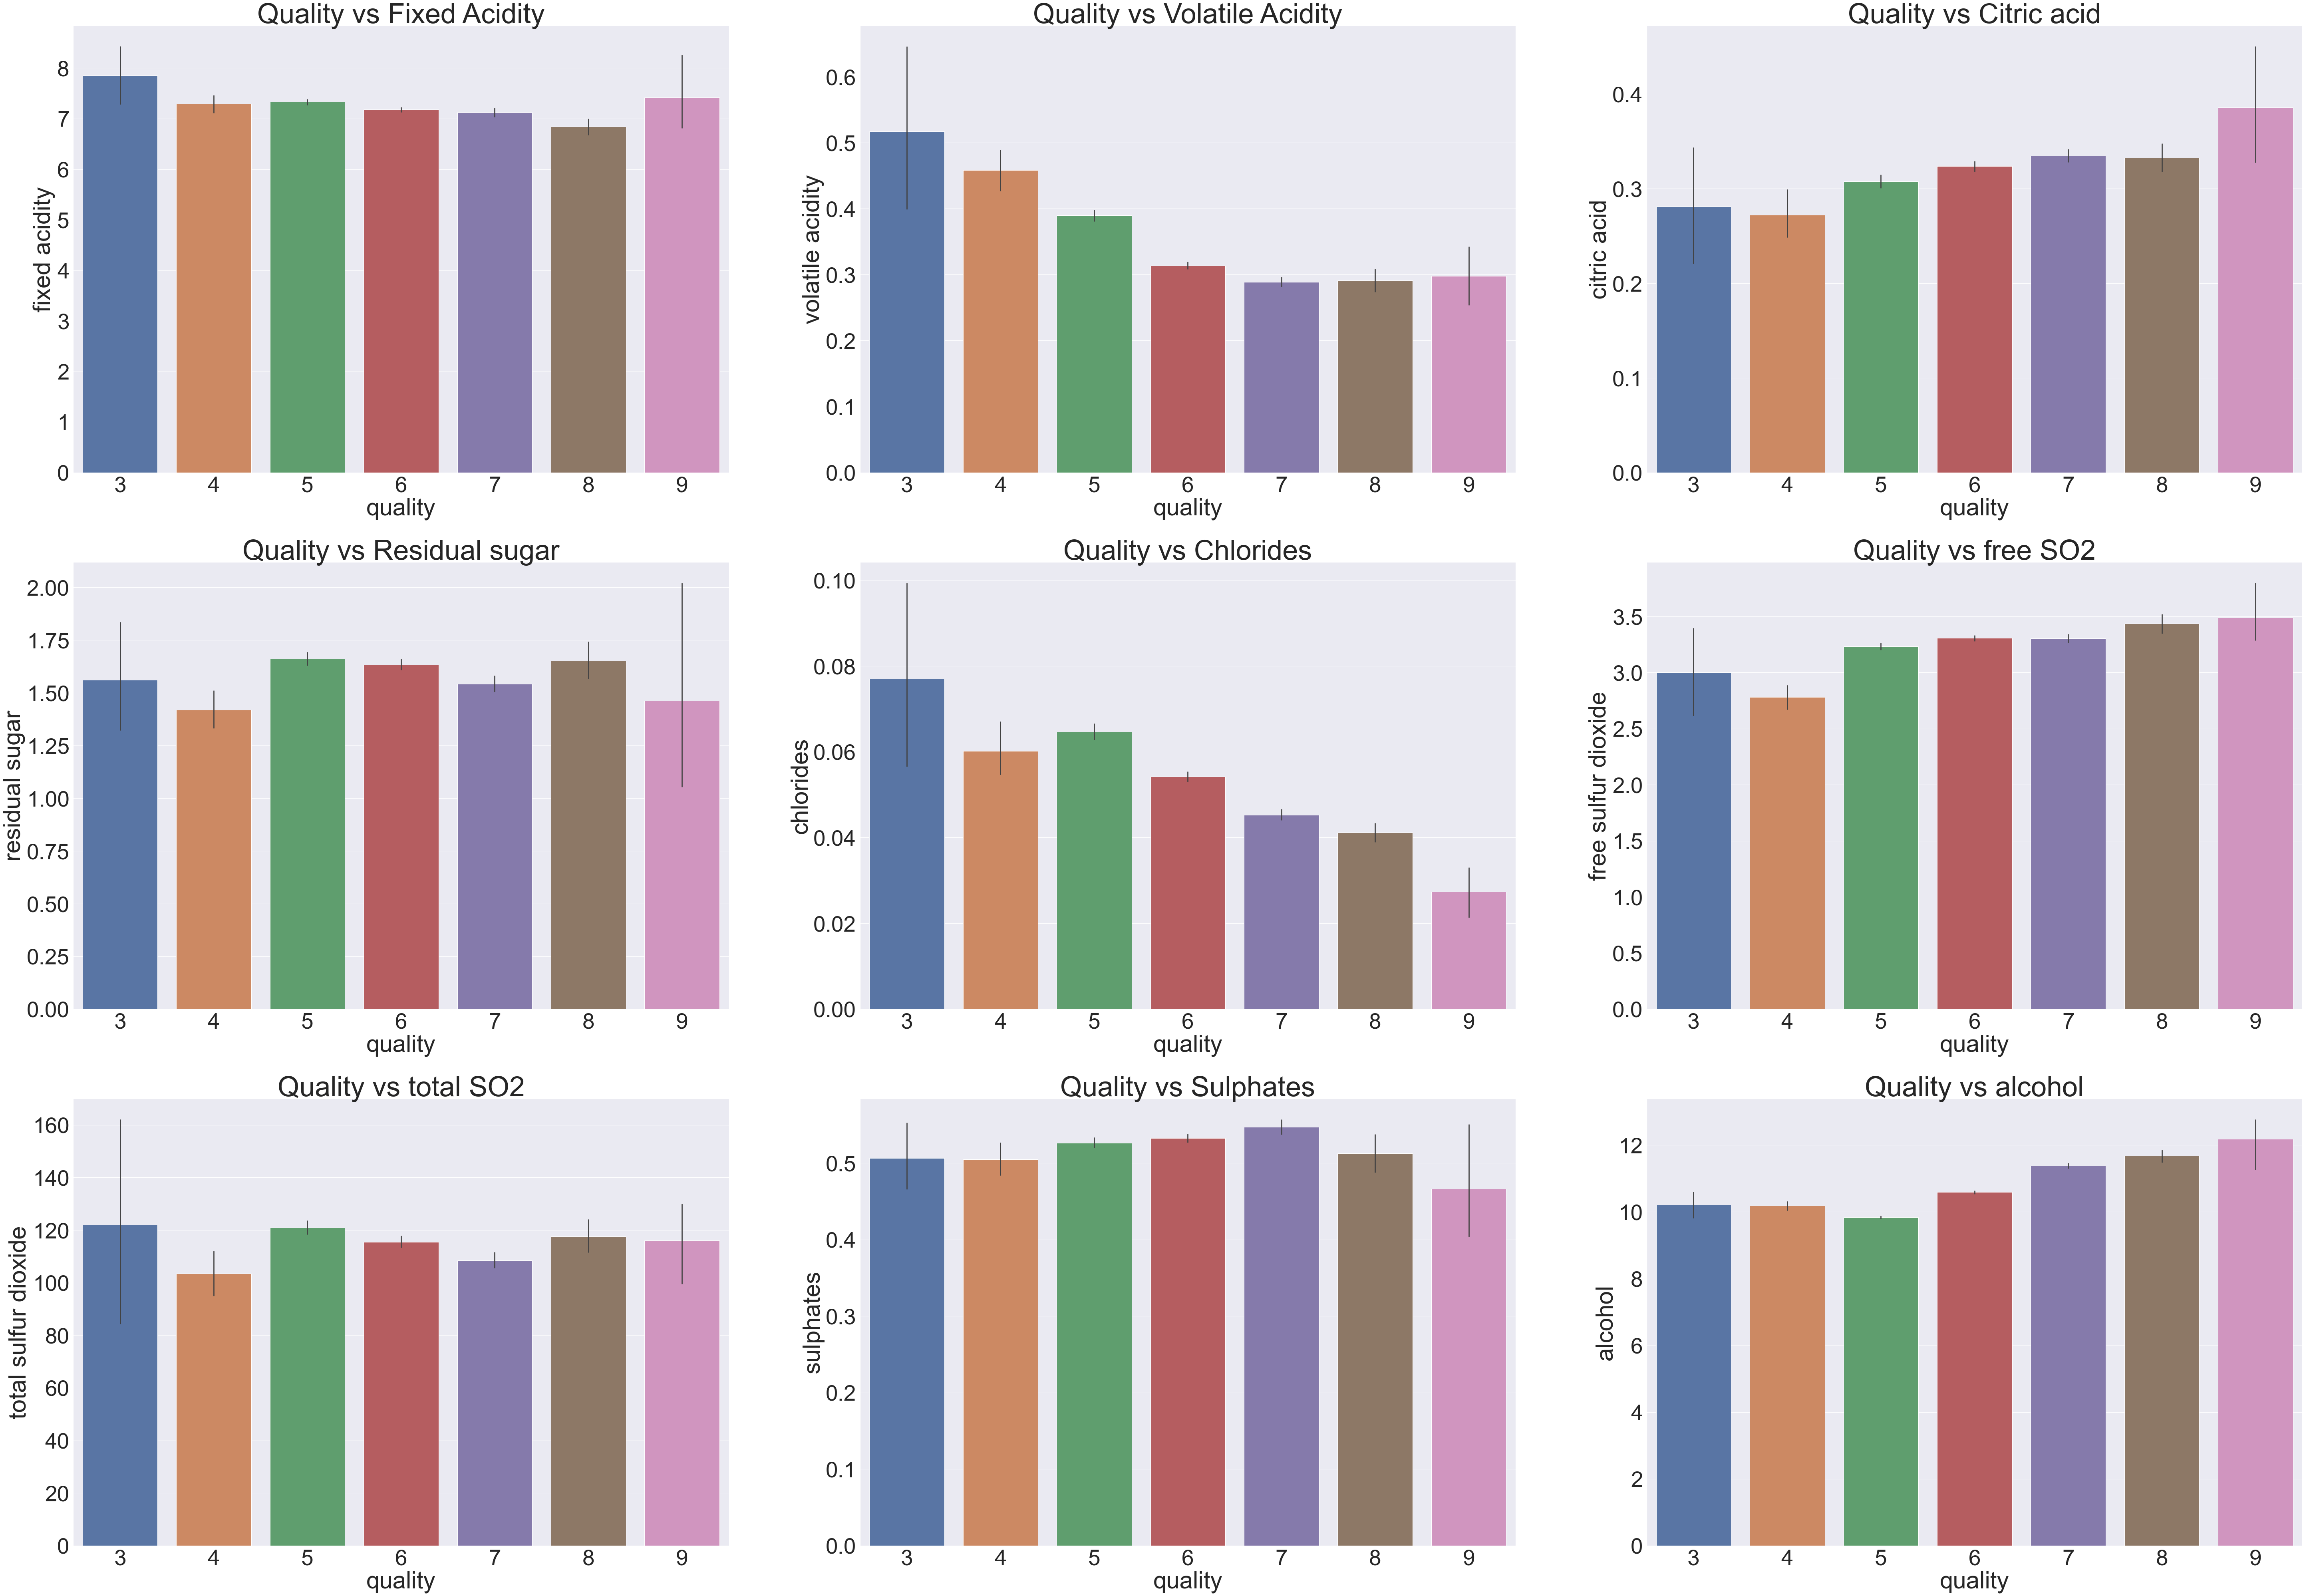

In [15]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs total SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=70)
sns.barplot(x = 'quality', y = 'alcohol', data = df)

<AxesSubplot:xlabel='type', ylabel='count'>

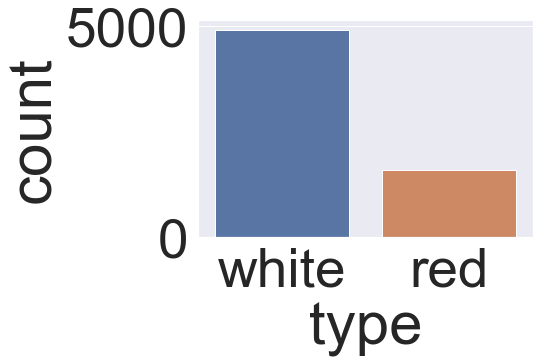

In [16]:
sns.countplot(df['type'])

<AxesSubplot:xlabel='quality', ylabel='count'>

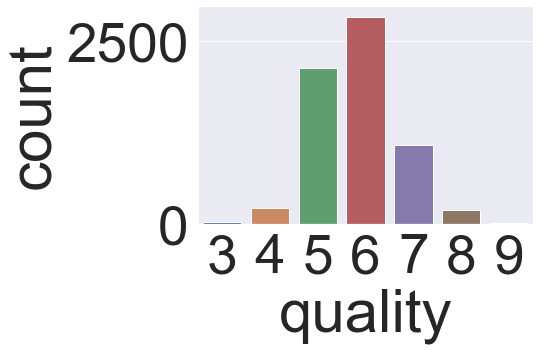

In [17]:
sns.countplot(df['quality'])

<AxesSubplot:>

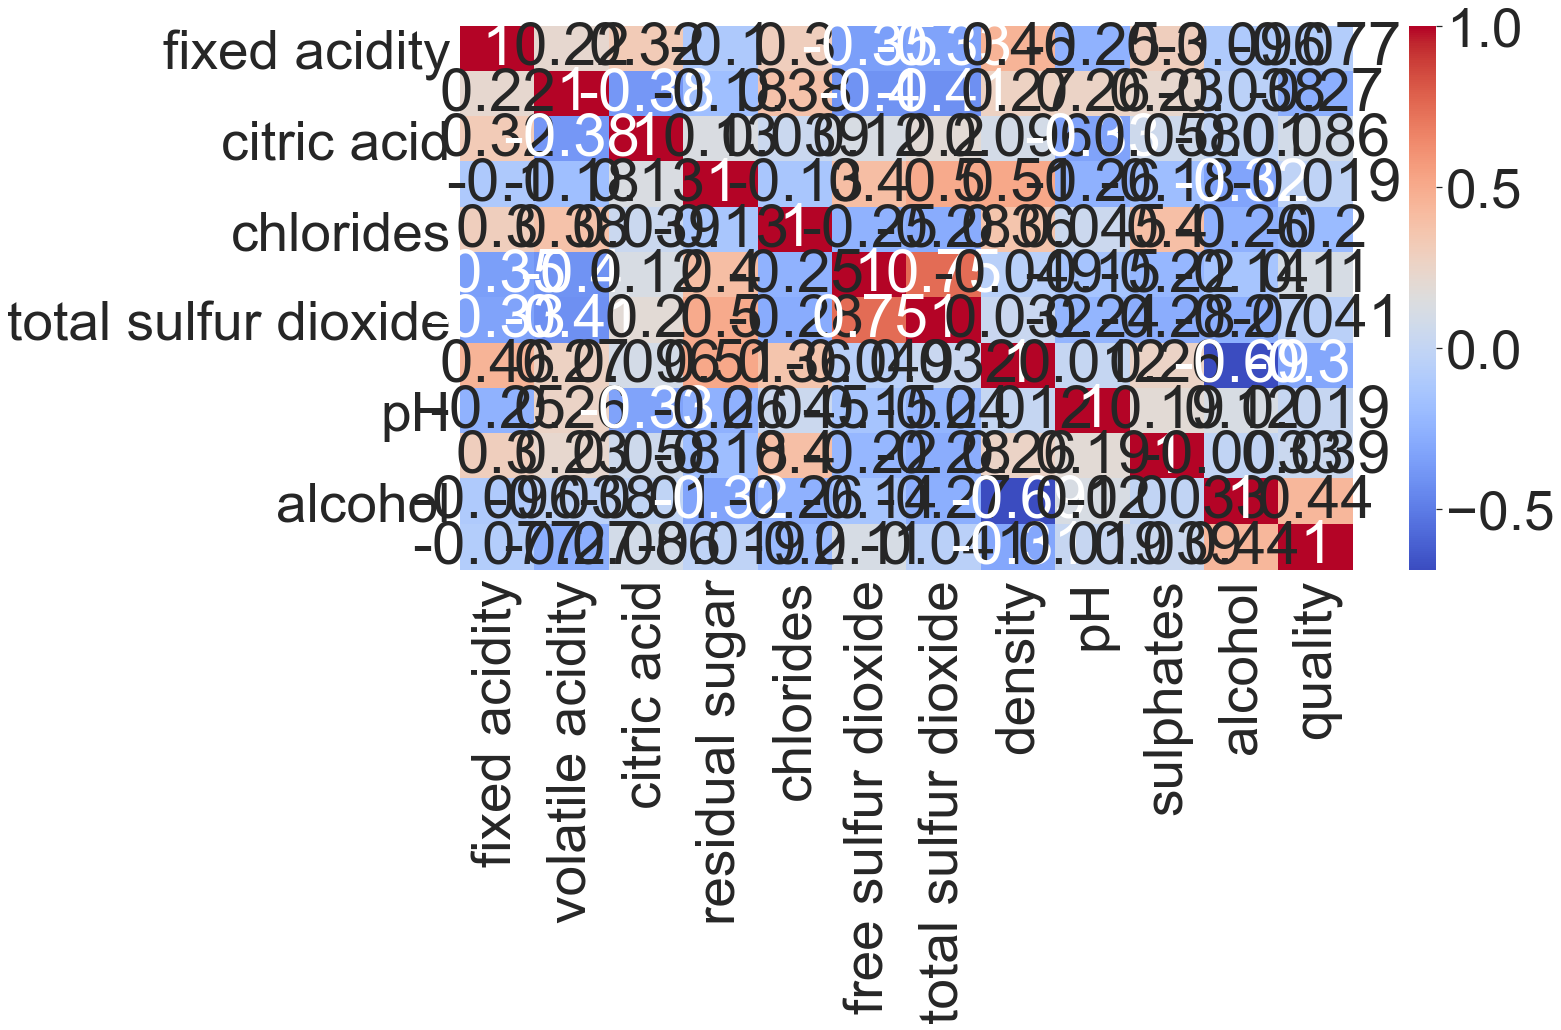

In [18]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [19]:
bins = (2, 6.5, 8)
classes = ['bad','good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = classes)

label_quality = LabelEncoder()

df['quality'] = label_quality.fit_transform(df['quality'])

df['quality'].value_counts()

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

# Input Split

In [43]:
X = df.drop(columns=['type', 'quality', 'total sulfur dioxide'])
y = df['quality']
X.isnan.sum()

AttributeError: 'DataFrame' object has no attribute 'isnan'

# Class Imbalancement

In [21]:
y.value_counts()

bad     5220
good    1272
Name: quality, dtype: int64

In [22]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [45]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
transform the dataset
X, y = oversample.fit_resample(X, y)

SyntaxError: invalid syntax (<ipython-input-45-9209268109e2>, line 3)

In [31]:
y.value_counts()

bad     5220
good    1272
Name: quality, dtype: int64

# Model Training

In [39]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)
#The goal of cross-validation is to estimate the expected level of fit of a model to a data set
#that is independent of the data that were used to train the model. 
#It can be used to estimate any quantitative measure of fit that is appropriate for the data and model.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,3.077312,0.045,3.828641,0.693647,3.00,0.450000,8.8
1,6.3,0.300,0.34,0.955511,0.049,2.708050,0.690143,3.30,0.490000,9.5
2,8.1,0.280,0.40,2.066863,0.050,3.433987,0.690694,3.26,0.440000,10.1
3,7.2,0.230,0.32,2.251292,0.058,3.871201,0.690945,3.19,0.400000,9.9
4,7.2,0.230,0.32,2.251292,0.058,3.871201,0.690945,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,1.098612,0.090,3.496508,0.690594,3.45,0.580000,10.5
6493,5.9,0.550,0.10,1.163151,0.062,3.688879,0.690704,3.52,0.531215,11.2
6494,6.3,0.510,0.13,1.193922,0.076,3.401197,0.691015,3.42,0.750000,11.0
6495,5.9,0.645,0.12,1.098612,0.075,3.496508,0.690880,3.57,0.710000,10.2


In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,3.077312,0.045,3.828641,0.693647,3.00,0.450000,8.8
1,6.3,0.300,0.34,0.955511,0.049,2.708050,0.690143,3.30,0.490000,9.5
2,8.1,0.280,0.40,2.066863,0.050,3.433987,0.690694,3.26,0.440000,10.1
3,7.2,0.230,0.32,2.251292,0.058,3.871201,0.690945,3.19,0.400000,9.9
4,7.2,0.230,0.32,2.251292,0.058,3.871201,0.690945,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,1.098612,0.090,3.496508,0.690594,3.45,0.580000,10.5
6493,5.9,0.550,0.10,1.163151,0.062,3.688879,0.690704,3.52,0.531215,11.2
6494,6.3,0.510,0.13,1.193922,0.076,3.401197,0.691015,3.42,0.750000,11.0
6495,5.9,0.645,0.12,1.098612,0.075,3.496508,0.690880,3.57,0.710000,10.2


In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

ValueError: Input contains NaN

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

ValueError: Input contains NaN

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

ValueError: Input contains NaN

In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm

In [37]:
import lightgbm 
model = lightgbm.LGBMClassifier()
classify(model, X, y)

ModuleNotFoundError: No module named 'lightgbm'